In [1]:
! pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 wh

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np

X = np.load('/content/drive/MyDrive/SafeReels-664/Extracted_Frames/X_data.npy')
y = np.load('/content/drive/MyDrive/SafeReels-664/Extracted_Frames/y_data.npy')

In [4]:
X.shape

(664, 5, 224, 224, 3)

In [5]:
y.shape

(664,)

In [6]:
X = X.reshape(-1, 224, 224, 3)
y = np.repeat(y, 5)

In [7]:
X.shape

(3320, 224, 224, 3)

In [8]:
y.shape

(3320,)

In [9]:
from PIL import Image

def data_generator(X, y):
    for img, label in zip(X, y):
        img = np.squeeze(img)  # Remove extra dimensions if present
        img = Image.fromarray(np.uint8(img))  # Convert to PIL image
        yield {"image": img, "labels": label}

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
from datasets import Dataset

train_dataset = Dataset.from_generator(lambda: data_generator(X_train, y_train))
test_dataset = Dataset.from_generator(lambda: data_generator(X_test, y_test))

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [12]:
train_dataset

Dataset({
    features: ['image', 'labels'],
    num_rows: 2656
})

In [13]:
ex = train_dataset[180]
ex

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224>,
 'labels': 2}

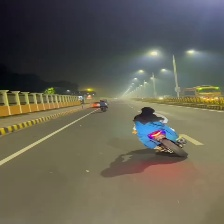

In [14]:
image = ex['image']
image

In [15]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [16]:
feature_extractor

ViTFeatureExtractor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [17]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[-0.8510, -0.8431, -0.8510,  ...,  0.0118,  0.0275,  0.0353],
          [-0.8510, -0.8510, -0.8510,  ...,  0.0039,  0.0196,  0.0275],
          [-0.8510, -0.8510, -0.8510,  ..., -0.0118, -0.0039, -0.0039],
          ...,
          [-0.1059, -0.1059, -0.1059,  ..., -0.0824, -0.0824, -0.0824],
          [-0.1059, -0.1059, -0.1059,  ..., -0.0824, -0.0824, -0.0824],
          [-0.1059, -0.1059, -0.1059,  ..., -0.0824, -0.0824, -0.0824]],

         [[-0.8667, -0.8588, -0.8667,  ...,  0.0431,  0.0431,  0.0510],
          [-0.8667, -0.8667, -0.8667,  ...,  0.0353,  0.0353,  0.0431],
          [-0.8667, -0.8667, -0.8667,  ...,  0.0118,  0.0196,  0.0196],
          ...,
          [-0.1451, -0.1451, -0.1451,  ..., -0.1529, -0.1529, -0.1529],
          [-0.1451, -0.1451, -0.1451,  ..., -0.1529, -0.1529, -0.1529],
          [-0.1451, -0.1451, -0.1451,  ..., -0.1529, -0.1529, -0.1529]],

         [[-0.7804, -0.7725, -0.7804,  ...,  0.3412,  0.3647,  0.3725],
          [-0

In [18]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [19]:
process_example(train_dataset[0])

{'pixel_values': tensor([[[[ 0.5216,  0.5451,  0.5294,  ..., -0.7333, -0.6157, -0.4980],
          [ 0.1216,  0.0196, -0.0824,  ..., -0.5451, -0.3333, -0.2235],
          [-0.4353, -0.4353, -0.4431,  ..., -0.3725, -0.4510, -0.4275],
          ...,
          [ 0.0510, -0.0667, -0.2235,  ...,  0.0196, -0.1529, -0.0745],
          [-0.0745,  0.0431, -0.0510,  ..., -0.0980, -0.1608, -0.1059],
          [-0.1922, -0.1373, -0.1608,  ...,  0.0667, -0.0196, -0.1373]],

         [[ 0.3098,  0.3333,  0.3412,  ..., -0.8588, -0.7490, -0.6314],
          [-0.0824, -0.1765, -0.2706,  ..., -0.6706, -0.4667, -0.3569],
          [-0.6235, -0.6235, -0.6235,  ..., -0.5059, -0.5843, -0.5608],
          ...,
          [-0.1451, -0.2627, -0.4196,  ..., -0.1922, -0.3569, -0.2784],
          [-0.2471, -0.1294, -0.2392,  ..., -0.3098, -0.3647, -0.3098],
          [-0.3569, -0.3020, -0.3490,  ..., -0.1451, -0.2235, -0.3412]],

         [[ 0.0824,  0.0980,  0.0588,  ..., -0.9843, -0.8745, -0.7569],
          [-0

In [20]:
def transform(example_batch):
    inputs = feature_extractor([x for x in example_batch["image"]], return_tensors="pt")
    inputs["labels"] = example_batch["labels"]
    return inputs

In [21]:
train_dataset = train_dataset.with_transform(transform)

In [22]:
test_dataset = test_dataset.with_transform(transform)

In [23]:
train_dataset[0:2]

{'pixel_values': tensor([[[[ 0.5216,  0.5451,  0.5294,  ..., -0.7333, -0.6157, -0.4980],
          [ 0.1216,  0.0196, -0.0824,  ..., -0.5451, -0.3333, -0.2235],
          [-0.4353, -0.4353, -0.4431,  ..., -0.3725, -0.4510, -0.4275],
          ...,
          [ 0.0510, -0.0667, -0.2235,  ...,  0.0196, -0.1529, -0.0745],
          [-0.0745,  0.0431, -0.0510,  ..., -0.0980, -0.1608, -0.1059],
          [-0.1922, -0.1373, -0.1608,  ...,  0.0667, -0.0196, -0.1373]],

         [[ 0.3098,  0.3333,  0.3412,  ..., -0.8588, -0.7490, -0.6314],
          [-0.0824, -0.1765, -0.2706,  ..., -0.6706, -0.4667, -0.3569],
          [-0.6235, -0.6235, -0.6235,  ..., -0.5059, -0.5843, -0.5608],
          ...,
          [-0.1451, -0.2627, -0.4196,  ..., -0.1922, -0.3569, -0.2784],
          [-0.2471, -0.1294, -0.2392,  ..., -0.3098, -0.3647, -0.3098],
          [-0.3569, -0.3020, -0.3490,  ..., -0.1451, -0.2235, -0.3412]],

         [[ 0.0824,  0.0980,  0.0588,  ..., -0.9843, -0.8745, -0.7569],
          [-0

In [24]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [25]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.2 MB/s eta 0:00:00


In [26]:
import evaluate  # Correct import for metric evaluation

accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")
f1_metric = evaluate.load("f1")

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    refs = p.label_ids

    return {
        "accuracy": accuracy_metric.compute(predictions=preds, references=refs)["accuracy"],
        "precision": precision_metric.compute(predictions=preds, references=refs, average="weighted")["precision"],
        "recall": recall_metric.compute(predictions=preds, references=refs, average="weighted")["recall"],
        "f1": f1_metric.compute(predictions=preds, references=refs, average="weighted")["f1"],
    }

Now we can load our pretrained model. We'll add `num_labels` on init to make sure the model creates a classification head with the right number of units. We'll also include the `id2label` and `label2id` mappings so we have human readable labels in the 🤗 hub widget if we choose to `push_to_hub`.

In [27]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=4,
    ignore_mismatched_sizes=True
)

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-safereels",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=1,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Now, all instances can be passed to Trainer and we are ready to start training!



In [29]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=feature_extractor,
)

<ipython-input-29-496b4c9dfe76>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [30]:
train_results = trainer.train()
# trainer.save_model()
# trainer.log_metrics("train", train_results.metrics)
# trainer.save_metrics("train", train_results.metrics)
# trainer.save_state()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
100,0.520900,0.584158,0.789157,0.798288,0.789157,0.768583
200,0.223800,0.433663,0.832831,0.833172,0.832831,0.830352
300,0.191700,0.389999,0.858434,0.855116,0.858434,0.855125
400,0.075200,0.305980,0.905120,0.905548,0.905120,0.903710
500,0.052000,0.275535,0.930723,0.931414,0.930723,0.930195
600,0.001900,0.248158,0.936747,0.936916,0.936747,0.935551


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
predictions_output = trainer.predict(test_dataset)
preds = np.argmax(predictions_output.predictions, axis=1)
true_labels = predictions_output.label_ids

In [43]:
cm = confusion_matrix(true_labels, preds)

In [44]:
labels = ['Safe', 'Adult', 'Harmful', 'Suicidal']

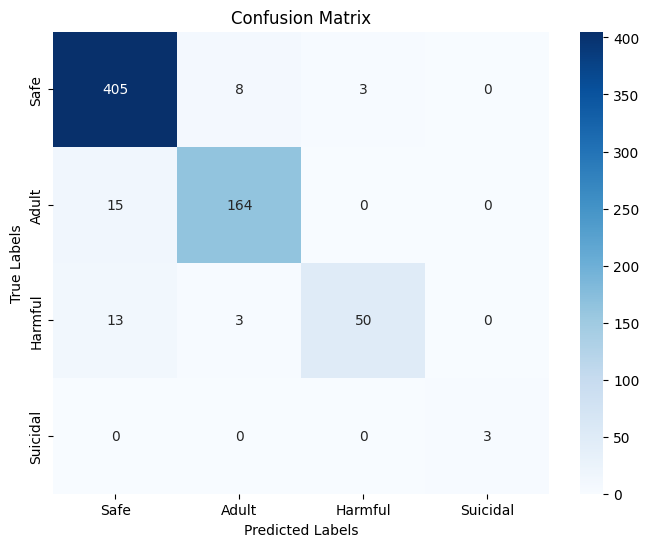

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()